In [63]:
# First we Get the Data Ready

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^NSEI', start = '2020-03-11',end = '2022-07-10')
data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-11,10334.299805,10545.099609,10334.000000,10458.400391,10458.400391,1218500
2020-03-12,10039.950195,10040.750000,9508.000000,9590.150391,9590.150391,1343500
2020-03-13,9107.599609,10159.400391,8555.150391,9955.200195,9955.200195,1388000
2020-03-16,9587.799805,9602.200195,9165.099609,9197.400391,9197.400391,897700
2020-03-17,9285.400391,9403.799805,8915.599609,8967.049805,8967.049805,935600
...,...,...,...,...,...,...
2022-07-04,15710.500000,15852.349609,15661.799805,15835.349609,15835.349609,304300
2022-07-05,15909.150391,16025.750000,15785.450195,15810.849609,15810.849609,254200
2022-07-06,15818.200195,16011.349609,15800.900391,15989.799805,15989.799805,288400


In [64]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)
data['ATR'] = ta.atr(data.High, data.Low,data.Close, length=16)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]





['RSI', 'CCI', 'BOP', 'STOCHRSIk_16_14_3_3', 'WPR']
|

In [65]:
#more Indicators


# data['RSI'] = ta.rsi(data.Close, length=16)
data['CCI'] = ta.cci(data.High, data.Low, data.Close, length=15)
data['AO'] = ta.ao(data.High,data.Low)
data['MOM'] = ta.mom(data.Close,length=15)

a = ta.macd(data.Close)
data = data.join(a)

# data['ATR'] = ta.atr(data.High, data.Low,data.Close, length=16)
data['BOP'] = ta.bop(data.Open, data.High, data.Low, data.Close, length=15)
data['RVI'] = ta.rvi(data.Close)

a = ta.dm(data.High, data.Low, length=15)
data = data.join(a)

a = ta.stoch(data.High, data.Low, data.Close)
data = data.join(a)

a = ta.stochrsi(data.Close, length=15)
data = data.join(a)

data["WPR"] = ta.willr(data.High, data.Low, data.Close, length=15)


data['TargetNextClose'] = data['Adj Close'].shift(-1)


data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Adj Close', 'Date','Target','TargetClass'], axis=1, inplace=True)


In [66]:
data

,Open,High,Low,Close,RSI,EMAF,EMAM,EMAS,ATR,CCI,AO,MOM,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BOP,RVI,DMP_15,DMN_15,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_15_14_3_3,STOCHRSId_15_14_3_3,WPR,TargetNextClose
0,12023.450195,12025.450195,11661.299805,11680.349609,55.387679,11602.111383,10835.599502,10314.946003,176.005776,52.907787,423.703007,548.500000,149.367829,45.116793,104.251035,-0.942195,78.103708,50.498566,38.972896,86.424019,91.555803,87.843136,95.947712,-27.937712,11762.450195
1,11727.400391,11789.750000,11667.849609,11762.450195,57.848313,11617.381746,10853.952981,10334.118244,172.623978,34.904066,392.404320,956.900391,143.222353,31.177054,112.045299,0.287528,80.979198,47.131887,36.374619,79.321752,86.510518,73.966061,87.269732,-22.467100,11873.049805
2,11879.200195,11898.250000,11820.400391,11873.049805,60.956528,11641.731085,10874.133116,10354.501443,170.322332,59.877903,366.542142,822.799805,145.598119,26.842256,118.755863,-0.079003,83.303985,51.223217,33.949572,74.686027,80.143933,61.127547,74.312248,-16.465027,11896.799805
3,11861.000000,11949.250000,11837.250000,11896.799805,61.607874,11666.023344,10894.383942,10374.929236,166.676986,63.678470,344.746056,669.250000,147.694823,23.151168,124.543655,0.319641,85.117180,51.208335,31.686204,79.413200,77.806993,61.514597,65.536068,-15.234811,11937.650391
4,11958.549805,12018.650391,11775.750000,11937.650391,62.752998,11691.892586,10915.042683,10395.627529,171.441194,64.443343,330.350302,715.250000,150.913144,21.095591,129.817552,-0.086041,86.451054,52.421171,29.573736,84.570468,79.556565,65.057466,62.566537,-10.441166,11896.450195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,15703.700195,15793.950195,15511.049805,15752.049805,44.493210,15839.094404,16527.663866,16629.787511,252.073445,21.005908,-244.156572,-449.750000,-156.850007,42.990748,-199.840755,0.170907,49.166650,50.675317,77.281428,70.196601,61.031811,86.612994,85.897551,-23.573743,15835.349609
425,15710.500000,15852.349609,15661.799805,15835.349609,46.949904,15838.737757,16513.954673,16619.265154,248.228217,63.506288,-257.170468,60.949219,-138.915245,48.740408,-187.655653,0.655207,53.594755,51.190257,72.129333,81.421442,71.104637,92.781114,88.653303,-12.378282,15810.849609
426,15909.150391,16025.750000,15785.450195,15810.849609,46.304087,15836.081743,16500.031801,16608.557664,247.732691,95.418759,-224.513672,78.750000,-125.235129,49.936419,-175.171548,-0.409076,48.585552,59.337599,67.320710,79.511985,77.043343,94.494864,91.296324,-25.512019,15989.799805
427,15818.200195,16011.349609,15800.900391,15989.799805,51.522565,15850.721558,16489.928197,16600.362195,245.402474,106.791875,-198.997728,297.649414,-98.814679,61.085495,-159.900174,0.815397,53.651350,55.381759,62.832663,85.947284,82.293570,98.748870,95.341616,-4.267847,16132.900391


In [67]:
data_set = data.iloc[:, 0:len(data.columns)]#.values
pd.set_option('display.max_columns', None)

data_set

,Open,High,Low,Close,RSI,EMAF,EMAM,EMAS,ATR,CCI,AO,MOM,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BOP,RVI,DMP_15,DMN_15,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_15_14_3_3,STOCHRSId_15_14_3_3,WPR,TargetNextClose
0,12023.450195,12025.450195,11661.299805,11680.349609,55.387679,11602.111383,10835.599502,10314.946003,176.005776,52.907787,423.703007,548.500000,149.367829,45.116793,104.251035,-0.942195,78.103708,50.498566,38.972896,86.424019,91.555803,87.843136,95.947712,-27.937712,11762.450195
1,11727.400391,11789.750000,11667.849609,11762.450195,57.848313,11617.381746,10853.952981,10334.118244,172.623978,34.904066,392.404320,956.900391,143.222353,31.177054,112.045299,0.287528,80.979198,47.131887,36.374619,79.321752,86.510518,73.966061,87.269732,-22.467100,11873.049805
2,11879.200195,11898.250000,11820.400391,11873.049805,60.956528,11641.731085,10874.133116,10354.501443,170.322332,59.877903,366.542142,822.799805,145.598119,26.842256,118.755863,-0.079003,83.303985,51.223217,33.949572,74.686027,80.143933,61.127547,74.312248,-16.465027,11896.799805
3,11861.000000,11949.250000,11837.250000,11896.799805,61.607874,11666.023344,10894.383942,10374.929236,166.676986,63.678470,344.746056,669.250000,147.694823,23.151168,124.543655,0.319641,85.117180,51.208335,31.686204,79.413200,77.806993,61.514597,65.536068,-15.234811,11937.650391
4,11958.549805,12018.650391,11775.750000,11937.650391,62.752998,11691.892586,10915.042683,10395.627529,171.441194,64.443343,330.350302,715.250000,150.913144,21.095591,129.817552,-0.086041,86.451054,52.421171,29.573736,84.570468,79.556565,65.057466,62.566537,-10.441166,11896.450195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,15703.700195,15793.950195,15511.049805,15752.049805,44.493210,15839.094404,16527.663866,16629.787511,252.073445,21.005908,-244.156572,-449.750000,-156.850007,42.990748,-199.840755,0.170907,49.166650,50.675317,77.281428,70.196601,61.031811,86.612994,85.897551,-23.573743,15835.349609
425,15710.500000,15852.349609,15661.799805,15835.349609,46.949904,15838.737757,16513.954673,16619.265154,248.228217,63.506288,-257.170468,60.949219,-138.915245,48.740408,-187.655653,0.655207,53.594755,51.190257,72.129333,81.421442,71.104637,92.781114,88.653303,-12.378282,15810.849609
426,15909.150391,16025.750000,15785.450195,15810.849609,46.304087,15836.081743,16500.031801,16608.557664,247.732691,95.418759,-224.513672,78.750000,-125.235129,49.936419,-175.171548,-0.409076,48.585552,59.337599,67.320710,79.511985,77.043343,94.494864,91.296324,-25.512019,15989.799805
427,15818.200195,16011.349609,15800.900391,15989.799805,51.522565,15850.721558,16489.928197,16600.362195,245.402474,106.791875,-198.997728,297.649414,-98.814679,61.085495,-159.900174,0.815397,53.651350,55.381759,62.832663,85.947284,82.293570,98.748870,95.341616,-4.267847,16132.900391


In [68]:
data_set=data_set[['Open','High','Low','Close','RSI', 'CCI', 'BOP', 'STOCHRSIk_15_14_3_3', 'WPR','TargetNextClose']]

In [69]:
#Transform the data for the LSTM to Read

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_set_scaled = sc.fit_transform(data_set)
data_set_scaled

array([[0.0559833 , 0.04358316, 0.01821307, ..., 0.87843136, 0.72115672,
        0.01756488],
       [0.01350264, 0.00931843, 0.01916097, ..., 0.73966061, 0.77726442,
        0.03374707],
       [0.03528464, 0.02509153, 0.04123826, ..., 0.61127547, 0.83882288,
        0.03722201],
       ...,
       [0.61354858, 0.62512362, 0.61506395, ..., 0.94494864, 0.74603512,
        0.63608219],
       [0.60049799, 0.62303017, 0.61729992, ..., 0.9874887 , 0.96391961,
        0.65701971],
       [0.6429069 , 0.64325905, 0.65276375, ..., 0.9874887 , 0.98902692,
        0.66985127]])

In [70]:
# multiple feature from data provided to the model

X = []

#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values

backcandles = 20
print(data_set_scaled.shape[0])

for j in range(len(data_set.columns)-1):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...

X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])

y=np.reshape(yi,(len(yi),1))

#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# print(X)
print(X.shape)
# print(y)
print(y.shape)

429
(409, 20, 9)
(409, 1)


In [71]:
# split data into train test sets

splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

327
(327, 20, 9)
(82, 20, 9)
(327, 1)
(82, 1)
[[0.15765983]
 [0.18022865]
 [0.18959998]
 [0.16523154]
 [0.17801195]
 [0.18787352]
 [0.20670406]
 [0.17791693]
 [0.19673276]
 [0.19409183]
 [0.21459026]
 [0.21527796]
 [0.21822623]
 [0.23646409]
 [0.25068577]
 [0.25612865]
 [0.27604912]
 [0.26861643]
 [0.27381784]
 [0.28029963]
 [0.28171876]
 [0.29852292]
 [0.30700909]
 [0.30991335]
 [0.24668416]
 [0.26686067]
 [0.28658367]
 [0.30826004]
 [0.3263956 ]
 [0.33508652]
 [0.34230717]
 [0.34227787]
 [0.34765489]
 [0.36439318]
 [0.37413759]
 [0.36634641]
 [0.36504416]
 [0.39575537]
 [0.41587345]
 [0.42738833]
 [0.42759308]
 [0.43209221]
 [0.40840418]
 [0.38610598]
 [0.42119931]
 [0.43927628]
 [0.43132407]
 [0.39936205]
 [0.37990239]
 [0.34019291]
 [0.31825321]
 [0.29148517]
 [0.38609141]
 [0.43973708]
 [0.46052828]
 [0.47599362]
 [0.48017812]
 [0.5082044 ]
 [0.50725337]
 [0.50684372]
 [0.51661741]
 [0.51515428]
 [0.53730617]
 [0.53712328]
 [0.52182625]
 [0.50866535]
 [0.48859114]
 [0.44381199]
 [

In [72]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, len(data_set.columns)-1), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
20/20 [==============================] - 2s 24ms/step - loss: 0.0573 - val_loss: 0.0030
Epoch 2/30
20/20 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 3/30
20/20 [==============================] - 0s 8ms/step - loss: 0.0021 - val_loss: 0.0042
Epoch 4/30
20/20 [==============================] - 0s 9ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 5/30
20/20 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0035
Epoch 6/30
20/20 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 0.0037
Epoch 7/30
20/20 [==============================] - 0s 9ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 8/30
20/20 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 9/30
20/20 [==============================] - 0s 9ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 10/30
20/20 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 11/30
20/20 

In [73]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Display the Mean Squared Error
print("Mean Squared Error:", mse)



3/3 [==============================] - 0s 4ms/step
[0.6970642] [0.7298177]
[0.6958371] [0.76505748]
[0.71325856] [0.73458031]
[0.7380596] [0.7802812]
[0.7237048] [0.82588722]
[0.75388515] [0.80109426]
[0.7814828] [0.83004972]
[0.7697171] [0.81982979]
[0.79663813] [0.81647916]
[0.7881329] [0.80627381]
Mean Squared Error: 0.002967341988663559


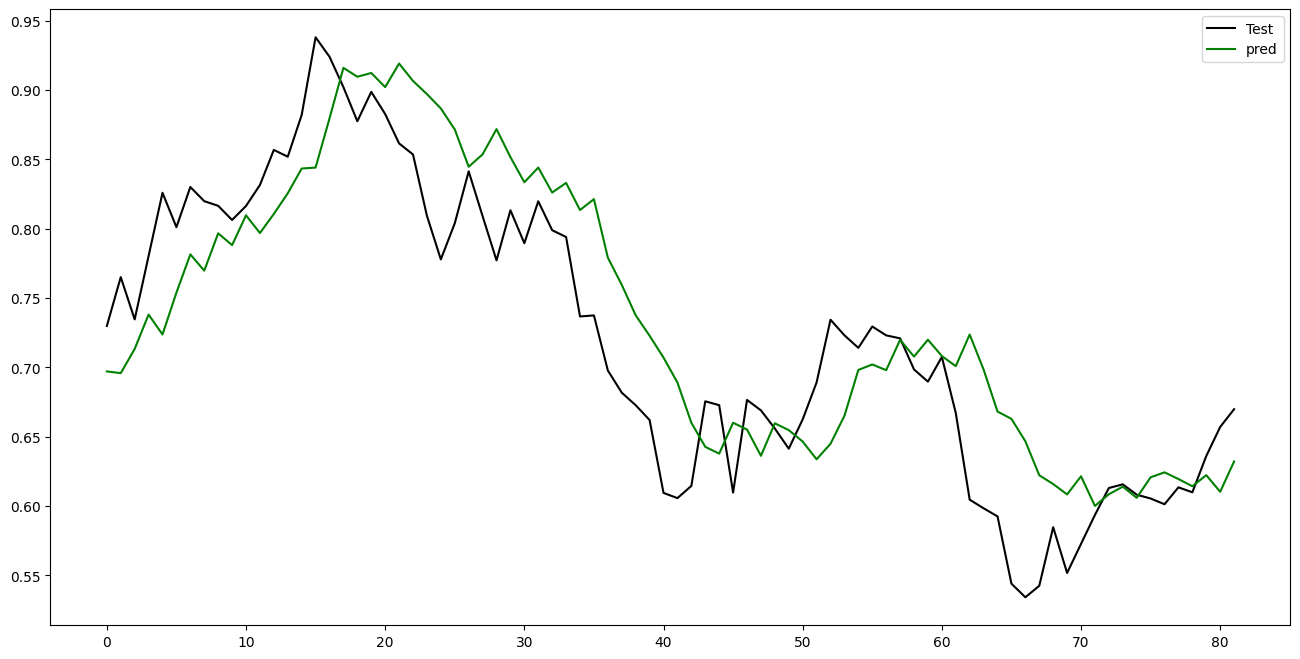

In [74]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [75]:
y_pred_with_empty_columns = np.insert(y_pred, [0]*(len(data_set.columns)-1), values=0, axis=1)
y_pred_with_empty_columns.shape

y_test_with_empty_columns = np.insert(y_test, [0]*((len(data_set.columns)-1)), values=0, axis=1)
y_test_with_empty_columns.shape


(82, 10)

In [76]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit on the original data and transform the input data
scaler.fit(data_set)

print(data_set.shape)
print(y_pred_with_empty_columns.shape)

# Inverse transform the predicted values to the original scale
y_pred_original = scaler.inverse_transform(y_pred_with_empty_columns)
y_test_original = scaler.inverse_transform(y_test_with_empty_columns)
y_test=y_test_original[:,len(data_set.columns)-1]
y_pred=y_pred_original[:,len(data_set.columns)-1]

(429, 10)
(82, 10)


In [77]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test[:len(y_pred)-1], y_pred[1:]+225)

# Display the Mean Squared Error
print("Mean Squared Error:", mse)


Mean Squared Error: 185802.22333878654


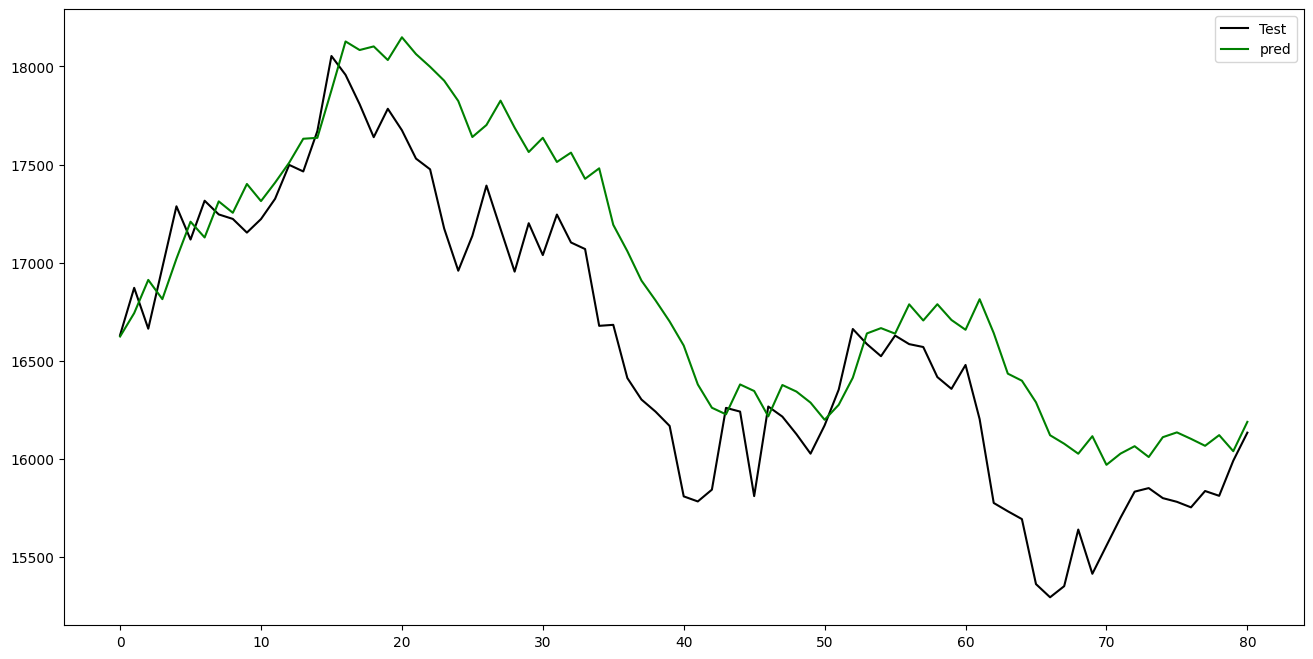

In [78]:
plt.figure(figsize=(16,8))
plt.plot(y_test[:len(y_pred)-1], color = 'black', label = 'Test')
plt.plot(y_pred[1:]+225, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [79]:
print("GPU!" ,"available" if tf.config.list_physical_devices("GPU") else "Not Available")

GPU! Not Available


In [80]:
test_df=data[splitlimit+backcandles:]
# test_df['predicted']
test_df['predicted']=y_pred

/tmp/ipykernel_9602/714139406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted']=y_pred


In [81]:
test_df[['Close','TargetNextClose','predicted']]

,Close,TargetNextClose,predicted
347,16594.900391,16630.449219,16406.589844
348,16630.449219,16871.300781,16398.203125
349,16871.300781,16663.000000,16517.273438
350,16663.000000,16975.349609,16686.779297
351,16975.349609,17287.050781,16588.669922
...,...,...,...
424,15752.049805,15835.349609,15876.271484
425,15835.349609,15810.849609,15840.856445
426,15810.849609,15989.799805,15895.251953
427,15989.799805,16132.900391,15813.393555


In [82]:
# Create a new column to represent the prediction result
test_df['diff']=abs(test_df['Close']-test_df['TargetNextClose'])
test_df['PredictionResult'] = np.where(test_df['predicted'] > test_df['Close'], 1, 0)
test_df['AcctualResult'] = np.where(test_df['TargetNextClose'] > test_df['Close'], 1, 0)

/tmp/ipykernel_9602/631517069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['diff']=abs(test_df['Close']-test_df['TargetNextClose'])
/tmp/ipykernel_9602/631517069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['PredictionResult'] = np.where(test_df['predicted'] > test_df['Close'], 1, 0)
/tmp/ipykernel_9602/631517069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [83]:
test_df[['Close','TargetNextClose','predicted','PredictionResult','AcctualResult']]

,Close,TargetNextClose,predicted,PredictionResult,AcctualResult
347,16594.900391,16630.449219,16406.589844,0,1
348,16630.449219,16871.300781,16398.203125,0,1
349,16871.300781,16663.000000,16517.273438,0,0
350,16663.000000,16975.349609,16686.779297,1,1
351,16975.349609,17287.050781,16588.669922,0,1
...,...,...,...,...,...
424,15752.049805,15835.349609,15876.271484,1,1
425,15835.349609,15810.849609,15840.856445,1,0
426,15810.849609,15989.799805,15895.251953,1,1
427,15989.799805,16132.900391,15813.393555,0,1


In [84]:
sum_diff = test_df.loc[test_df['PredictionResult'] != test_df['AcctualResult'], 'diff'].sum()

# Display the sum of differences
print("Sum of differences:", sum_diff)

Sum of differences: 6806.4521484375


In [85]:
sum_diff = test_df.loc[test_df['PredictionResult'] == test_df['AcctualResult'], 'diff'].sum()

# Display the sum of differences
print("Sum of differences:", sum_diff)

Sum of differences: 5850.6533203125


In [86]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(test_df['PredictionResult'], test_df['AcctualResult'])

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 50.00%


## Classification Model 

In [87]:
new_df=data
new_df.columns

new_df['direction'] = (new_df['Close'] <= new_df['TargetNextClose']).astype(int)

new_df.drop(['TargetNextClose'], axis=1)
new_df=new_df[['RSI', 'CCI', 'BOP', 'STOCHRSIk_15_14_3_3', 'WPR','direction']]

In [88]:
new_data_set = new_df.iloc[:, 0:len(new_df.columns)]#.values
pd.set_option('display.max_columns', None)

new_data_set.head(20)


,RSI,CCI,BOP,STOCHRSIk_15_14_3_3,WPR,direction
0,55.387679,52.907787,-0.942195,87.843136,-27.937712,1
1,57.848313,34.904066,0.287528,73.966061,-22.467100,1
2,60.956528,59.877903,-0.079003,61.127547,-16.465027,1
3,61.607874,63.678470,0.319641,61.514597,-15.234811,1
4,62.752998,64.443343,-0.086041,65.057466,-10.441166,0
5,60.793558,48.983297,0.055557,58.681115,-19.015319,1
6,61.843869,73.134479,-0.418706,53.161336,-16.592606,0
7,54.359934,-35.885073,-0.733943,30.162210,-55.882029,1
8,58.395724,-27.199706,0.467486,25.431377,-34.347287,0
9,51.932488,-106.246273,-0.789202,9.387636,-81.244067,0


In [89]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_set_scaled = sc.fit_transform(new_data_set)
print(data_set_scaled)

[[0.48056073 0.62341534 0.         0.87843136 0.72115672 1.        ]
 [0.52388833 0.59016411 0.66091565 0.73966061 0.77726442 1.        ]
 [0.57861875 0.63628851 0.46392286 0.61127547 0.83882288 1.        ]
 ...
 [0.32061401 0.70192922 0.28652534 0.94494864 0.74603512 1.        ]
 [0.41250259 0.72293433 0.94461902 0.9874887  0.96391961 1.        ]
 [0.47811663 0.80381107 0.60482824 0.9874887  0.98902692 1.        ]]


In [90]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(len(new_data_set.columns)-1):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

429
[[[0.48056073 0.62341534 0.         0.87843136 0.72115672]
  [0.52388833 0.59016411 0.66091565 0.73966061 0.77726442]
  [0.57861875 0.63628851 0.46392286 0.61127547 0.83882288]
  ...
  [0.82150113 0.7084489  0.78574607 0.81635483 0.98957467]
  [0.6667457  0.66779097 0.03882473 0.68094088 0.79551125]
  [0.71234212 0.6564365  0.69659264 0.50222141 0.86200016]]

 [[0.52388833 0.59016411 0.66091565 0.73966061 0.77726442]
  [0.57861875 0.63628851 0.46392286 0.61127547 0.83882288]
  [0.59008785 0.64330781 0.67817474 0.61514597 0.85144023]
  ...
  [0.6667457  0.66779097 0.03882473 0.68094088 0.79551125]
  [0.71234212 0.6564365  0.69659264 0.50222141 0.86200016]
  [0.69868914 0.67060355 0.31494599 0.26546222 0.82876489]]

 [[0.57861875 0.63628851 0.46392286 0.61127547 0.83882288]
  [0.59008785 0.64330781 0.67817474 0.61514597 0.85144023]
  [0.61025154 0.64472046 0.4601405  0.65057466 0.90060481]
  ...
  [0.71234212 0.6564365  0.69659264 0.50222141 0.86200016]
  [0.69868914 0.67060355 0.314

In [91]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)



319
(319, 30, 5)
(80, 30, 5)
(319, 1)
(80, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]


In [92]:
y_test

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],

In [93]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import numpy as np

# Assuming you have X_train and y_train prepared, where y_train contains binary labels (0 or 1)

backcandles = 30# Specify the number of time steps
n_features = len(new_data_set.columns) - 1  # Number of features in your input data

model = Sequential()
model.add(LSTM(150, input_shape=(backcandles, n_features)))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train the binary classification model
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Make predictions on new data
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary classes
y_pred_classes = np.round(y_pred)


Epoch 1/30


20/20 [==============================] - 2s 28ms/step - loss: 0.6903 - accuracy: 0.5714 - val_loss: 0.7066 - val_accuracy: 0.4375
Epoch 2/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6829 - accuracy: 0.5819 - val_loss: 0.7226 - val_accuracy: 0.4375
Epoch 3/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6795 - accuracy: 0.5819 - val_loss: 0.7051 - val_accuracy: 0.4375
Epoch 4/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6769 - accuracy: 0.5819 - val_loss: 0.7246 - val_accuracy: 0.4375
Epoch 5/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6810 - accuracy: 0.5819 - val_loss: 0.7240 - val_accuracy: 0.4375
Epoch 6/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6769 - accuracy: 0.5819 - val_loss: 0.7111 - val_accuracy: 0.4375
Epoch 7/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6792 - accuracy: 0.5819 - val_loss: 0.7093 - val_accuracy: 0.4375
Epoch 8/30
20/20 [======

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is the target variable 'direction'
X = new_df.iloc[:,:len(new_df.columns)-1]  # Adjust columns as needed
y = new_df['direction']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]



# Create a Random Forest model
rf_model = RandomForestClassifier( random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


343


RandomForestClassifier(random_state=42)

In [95]:
X_train

,RSI,CCI,BOP,STOCHRSIk_15_14_3_3,WPR
0,55.387679,52.907787,-0.942195,87.843136,-27.937712
1,57.848313,34.904066,0.287528,73.966061,-22.467100
2,60.956528,59.877903,-0.079003,61.127547,-16.465027
3,61.607874,63.678470,0.319641,61.514597,-15.234811
4,62.752998,64.443343,-0.086041,65.057466,-10.441166
...,...,...,...,...,...
338,31.122124,-284.637520,-0.599502,22.626371,-96.887605
339,39.949394,-154.113988,0.527726,26.315585,-68.308687
340,42.553463,-117.022946,0.679505,33.385244,-58.874063
341,39.977054,-108.782357,0.064296,48.019155,-71.960769


In [96]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [97]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 44.19%


In [98]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 44.19%


In [99]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

attributes = ['RSI', 'CCI', 'AO', 'MOM', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATR',
       'BOP', 'RVI', 'DMP_16', 'DMN_16', 'STOCHk_14_3_3', 'STOCHd_14_3_3',
       'STOCHRSIk_16_14_3_3', 'STOCHRSId_16_14_3_3', 'WPR'] # All the indicators Are here


attributes = ['RSI', 'CCI', 'BOP', 'STOCHRSIk_15_14_3_3', 'WPR']

X = new_df[attributes]
y = new_df['direction']

train_pct_index = int(0.7 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 100.0000%
****Test Results****
Accuracy: 51.9380%
